<a href="https://colab.research.google.com/github/Pepe-Padilla/deep-learning/blob/main/Modelo1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo1D - DeepLearning


### Indice
1. Introducción
2. Importación y Normalización de datos
3. Entrenamiento
4. Gráfica de Perdidas
5. Test
6. Concluciones

##  1. Introducción

**Práctica DL** - Ejercicio de Bootcamp Inteligencia Artificial Full Stack Edición III

Este proyecto es un entregable para la práctica del Master Bootcamp Inteligencia Artificial Full Stack Edición III realizado por el centro de formación [@Keepcoding](https://github.com/KeepCoding)

---

El objetivo de este trabajo consiste en resolver un problema del mundo real empleando para ello técnicas vistas durante las sesiones de dicho módulo. En concreto, se trabajará en predecir la condición médica sufrida por una cohorte de pacientes a partir de las diferentes fuentes de información disponibles (imágenes y datos tabulares).

Las imagenes deben entrenar y obtener una de los siguientes respuestas:

| Enfermedad | Descripción | Código | Indice en salida |
|------------|-------------|--------|------------------|
| Actinic keratoses y carcinoma de células escamosas | Tipo de cáncer de piel | akiec | 0 |
| Nevus melanocítico | Lesión benigna común | nv | 1 |
| Melanoma | Tipo de cáncer de piel agresivo | mel | 2 |
| Lesiones benignas de queratosis | Incluyen lentigo solar y queratosis seborreica | bkl | 3 |
| Dermatofibroma | Lesión benigna del tejido fibroso | df | 4 |
| Vasculares | Lesiones vasculares como hemangiomas | vasc | 5 |
| Lesión de células basales | Un tipo de cáncer de piel menos agresivo que el melanoma | bcc | 6 |

---



## 2. Importación y Normalización de datos

El conjunto de entrenamiento tiene dimensiones:  (51000, 28, 28)
El conjunto de validación tiene dimensiones:  (9000, 28, 28)
El conjunto de test tiene dimensiones:  (10000, 28, 28)
El conjunto de entrenamiento (etiquetas) tiene dimensiones:  (51000,)
El conjunto de validación (etiquetas) tiene dimensiones:  (9000,)
El conjunto de test (etiquetas) tiene dimensiones:  (10000,)
El conjunto de entrenamiento (etiquetas) en one-hot encoding tiene dimensiones:  (51000, 10)
El conjunto de validación (etiquetas) en one-hot encoding tiene dimensiones:  (9000, 10)
El conjunto de test (etiquetas) en one-hot encoding tiene dimensiones:  (10000, 10)


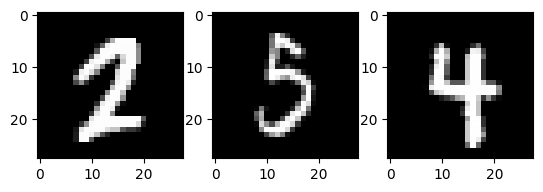

In [14]:
# Importamos el dataset que vamos a utilizar: el MNIST
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split

# Cargamos el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

# Normalizamos el dataset
x_train = x_train / 255.
x_test = x_test / 255.
x_val= x_val / 255.

# El dataset ya está dividido en train, validation y test. Dentro de cada uno
# de estos subsets ver el número de ejemplos y las dimensiones:
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

#Hacemos lo mismo para las etiquetas.
print("El conjunto de entrenamiento (etiquetas) tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) tiene dimensiones: ",y_test.shape)

# Cada etiqueta debería ser guardada en un vector de longitud = N_CLASES, con todo 0s excepto para
# el índice que indica la clase a la que pertenece la imágen, que contiene un 1)
# Por ejemplo, si tenemos 10 clases (números del 0 al 9), y la etiqueta
# pertenece al número 5:
# label = [0 0 0 0 0 1 0 0 0 0]
#Esto se llama one-hot encodding, cambiamos el formato de la etiquetas
y_train = tf.one_hot(y_train, depth=10)
y_val = tf.one_hot(y_val, depth=10)
y_test = tf.one_hot(y_test, depth=10)

print("El conjunto de entrenamiento (etiquetas) en one-hot encoding tiene dimensiones: ", y_train.shape)
print("El conjunto de validación (etiquetas) en one-hot encoding tiene dimensiones: ",y_val.shape)
print("El conjunto de test (etiquetas) en one-hot encoding tiene dimensiones: ",y_test.shape)

# Veamos algunas de las imágenes del dataset...
# Para ello, solo necesitamos acceder a un vector de nuestra matrix y
# redimensionarlo a 28x28
plt.subplot(131)
plt.imshow(np.reshape(x_train[0, :], (28, 28)), cmap='gray')
plt.subplot(132)
plt.imshow(np.reshape(x_train[27500, :], (28, 28)), cmap='gray')
plt.subplot(133)
plt.imshow(np.reshape(x_train[41000, :], (28, 28)), cmap='gray')

In [15]:
# Ya hemos visto un poco en qué consiste el dataset del MNIST.
# Reducimos tamaño de entrenamiento para que vaya más rápido
size_train=10000
x_train=x_train[0:size_train]
y_train= y_train[0:size_train]
# Convertimos las imágenes a vectores, dado que aún no hemos visto cómo podemos implementar un modelo que trabaje con imágenes
x_train = tf.reshape(x_train, shape=(size_train, -1)) # Nuestros datos ya están en formato [N_instancias, variables] (nº instancias, 784 (28+28) pixels).
x_val = tf.reshape(x_val, shape=(9000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28+28) pixels).
x_test = tf.reshape(x_test, shape=(10000, -1)) # Nuestros datos ya están en formato [N_instancias, variables] ((nº instancias, 784 (28+28) pixels).

In [17]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float32'>
<dtype: 'float32'>


In [18]:
# convertimos las etiquetas a float64
y_train = tf.cast(y_train, "float64")
y_test = tf.cast(y_test, "float64")

In [19]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>


## 3. Entrenamiento

In [20]:
# hiperparametros

learning_rate = 0.1
n_epochs = 30
batch_size = 100

In [21]:
#  Definimos el batch de entrenamiento

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000).batch(batch_size)

In [22]:
# cuantas iteraciones habrá por época?
# en una época se tienen que ver todos los elementos del dataset, y estamos
# pasándole los elementos de 100 en 100, así que habrá 60000 / 100 = 600 épocas
total_batch =  x_train.shape[0] // batch_size
print(total_batch)

100


In [24]:
# y creamos las variables W y b para el entrenamiento
W = tf.zeros([784, 10], tf.double)
b = tf.ones([10], tf.double)

# para almacenar el histórico de costes
costs = []

# Create a TensorFlow session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# entrenamiento de nuestra red
for epoch in range(n_epochs):
    avg_cost = 0.

    # y si en vez de actualizar los pesos para cada imagen, lo hacemos
    # de X en X imágenes?
    # Get an iterator for the dataset
    iterator = train_ds.make_initializable_iterator()
    next_element = iterator.get_next()
    sess.run(iterator.initializer)

    while True:
        try:
            batch_xs, batch_ys = sess.run(next_element)

            # empezamos con la optimización

            # haremos uso de tf.GradientTape, que lleva un control de las variables
            # para poder calcular sus gradientes

            # Since we are not using eager execution, we don't need GradientTape
            # Operations are added to the computational graph.
            pred = tf.nn.softmax(tf.matmul(batch_xs, W) + b)
            cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))

            # Define optimization step using an optimizer
            optimizer = tf.train.GradientDescentOptimizer(learning_rate)
            train_op = optimizer.minimize(cost)

            # Execute the training operation within the session
            _, c = sess.run([train_op, cost])
            avg_cost += c / total_batch

        except tf.errors.OutOfRangeError:
            break

    # guardamos nuestro coste en el histórico
    costs.append(avg_cost)

    # imprimimos las iteraciones
    print("[{}] cost: {}".format(epoch, avg_cost))

print("Entrenamiento finalizado!!")
# Close the session when done.
sess.close()


Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_initializable_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


ValueError: No variables to optimize.

## 4. Gráfica de Perdidas

In [ ]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
plt.plot(np.arange(0, n_epochs), costs)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## 5. Test

In [ ]:
# comprobamos lo que ha aprendido nuestra red
pred = tf.nn.softmax(tf.matmul(x_test, W) + b)
correct_prediction =   tf.equal(tf.argmax(pred, 1), tf.argmax(y_test, 1))

# calculamos el accuracy (precisión)
accuracy =  tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.numpy())

## 6. Concluciones

Aquí van mis concluciones